# Exploratory data analysis on fitbit activity data

In [62]:
import pandas as pd;
import matplotlib.pyplot as plt;%matplotlib inline
%matplotlib inline


SyntaxError: invalid syntax (<ipython-input-62-5620b077d131>, line 2)

In [63]:
data = pd.read_csv('fitbit_export_activity_jan_mar.csv');

The data analysed is provided by the fitbit activity tracker for one particular person over the period of 3 months. Let's see if we can show any trends and dependencies in there.'

In [64]:
data

,Date,CalBurned,Steps,Distance,Floors,MinNoActivity,MinLowActivity,MinMidActivity,MinHighActivity,Cal
0,01-01-2016,1491,0,0,0,1440,0,0,0,0
1,02-01-2016,1491,0,0,0,1440,0,0,0,0
2,03-01-2016,1491,0,0,0,1440,0,0,0,0
3,04-01-2016,1491,0,0,0,1440,0,0,0,0
4,05-01-2016,1491,0,0,0,1440,0,0,0,0
5,06-01-2016,1491,0,0,0,1440,0,0,0,0
6,07-01-2016,1491,0,0,0,1440,0,0,0,0
7,08-01-2016,1491,0,0,0,1440,0,0,0,0
8,09-01-2016,1491,0,0,0,1440,0,0,0,0
9,10-01-2016,1993,11290,"7,64",0,1180,115,10,51,660


# Cleaning of the data
The data contains several records where absolutely no activity was tracked. Most certainly the person was not using their device on that day. These records contain no useful information at all, we'll discard them.

In [103]:
data = data[data['MinNoActivity']!= 1440]


One day consists of 24 * 60 = 11440 minutes. We can see however that the minutues within one day in our data do not add up to this value. To better account for fact, we introduce a new column, for 'MinUnknown' containing the missing minutes.

In [66]:
dfKnown = data['MinNoActivity']+data['MinLowActivity']+data['MinMidActivity']+data['MinHighActivity']


In [67]:
data['MinUnknown'] = 1440 - dfKnown

c:\Users\Elzbieta\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [68]:
data

,Date,CalBurned,Steps,Distance,Floors,MinNoActivity,MinLowActivity,MinMidActivity,MinHighActivity,Cal,MinUnknown
9,10-01-2016,1993,11290,"7,64",0,1180,115,10,51,660,84
10,11-01-2016,2460,11419,"7,78",0,649,284,16,32,1232,459
11,12-01-2016,2823,17148,"11,63",0,547,355,17,65,1716,456
12,13-01-2016,2352,10652,"7,24",0,734,207,20,48,1069,431
13,14-01-2016,2264,10276,"7,03",0,1206,187,8,39,959,0
14,15-01-2016,1754,3034,"2,05",0,1259,120,0,0,381,61
15,16-01-2016,2662,16874,"11,63",0,654,254,66,60,1535,406
16,17-01-2016,2416,12300,"8,33",0,864,237,31,51,1217,257
17,18-01-2016,2271,8771,"6,01",0,682,285,3,20,1046,450
18,19-01-2016,2298,9482,"6,42",0,567,274,6,25,1062,568


Let's just check if we did a good job in filling up missing data'

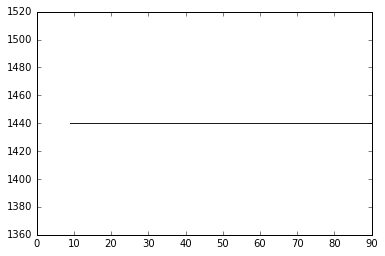

In [76]:
plt.plot(data.index.values, data['MinNoActivity']+data['MinLowActivity']+data['MinMidActivity']+data['MinHighActivity'] + data['MinUnknown'])

OK, looks like every day has 1440 minutes, that's what we wanted.

# Visualizing the data
Let's see some graphical representations of the data

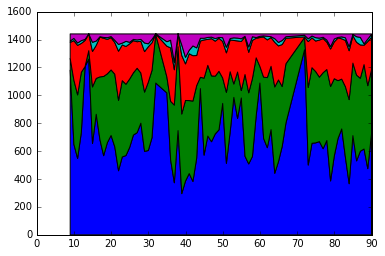

In [75]:
fig, ax = plt.subplots()
ax.stackplot(data.index.values, data['MinNoActivity'],data['MinUnknown'],data['MinLowActivity'], data['MinMidActivity'],data['MinHighActivity'] )
plt.show()

It looks like we have still a few records where the "no activity" is filling almost all the day. Probably, the fitbit device did not function correctly on that day. However, we leave this noisy data for now.

Let's investigate how active thi person is on everage

In [86]:
print( "Average activity per day in hours None=", round(data['MinNoActivity'].mean()/60,1), "Low=",round(data['MinLowActivity'].mean()/60,1), "Mid=",round(data['MinMidActivity'].mean()/60,1), "High=",round(data['MinHighActivity'].mean()/60,1))

Average activity per day in hours None= 11.4 Low= 4.1 Mid= 0.4 High= 0.7


In [89]:
data['Steps'].mean()

12177.894736842105

In conclusion, the person does not spend much time in an active way. However, it reaches the doctors recomendation of 10 thousand steps per day.

# Adding new features
Since we can suspect that the data depends on the day of the week, we'll add this feature

In [90]:
#This is how to convert the date to day of week
import datetime
datetime.datetime.strptime('01-01-16', '%d-%m-%y').strftime('%a')


'Fri'

In [102]:
#TODO: add the day of the week feature and provide some stats on that

In [101]:
#data['Date'].apply(lambda x: datetime.datetime.strptime(x, '%d-%m-%y').strftime('%a'))